In [1]:
import pandas as pd
import math

In [4]:
DATA_DIR = ''

In [5]:
all_data = pd.read_csv(DATA_DIR + 'all_matches_details.csv')

In [6]:
all_data.head()

,innings,delivery_no,delivery_no_over,non_striker,bowler,runs_extras,runs_total,runs_batsman,batsman,player_out,player_out_kind,match_no
0,1st innings,0,0.1,Shubman Gill,TA Boult,0,0,0,RA Tripathi,NaN,NaN,1216526
1,1st innings,1,0.2,Shubman Gill,TA Boult,0,1,1,RA Tripathi,NaN,NaN,1216526
2,1st innings,2,0.3,RA Tripathi,TA Boult,0,0,0,Shubman Gill,NaN,NaN,1216526
3,1st innings,3,0.4,RA Tripathi,TA Boult,1,1,0,Shubman Gill,NaN,NaN,1216526
4,1st innings,4,0.5,RA Tripathi,TA Boult,0,0,0,Shubman Gill,NaN,NaN,1216526


In [7]:
runs_bowler = all_data.groupby(["bowler"])["runs_total"].sum()
runs_bowler = runs_bowler.reset_index()
runs_bowler

,bowler,runs_total
0,A Mishra,72
1,A Nortje,529
2,A Zampa,92
3,AD Russell,178
4,AJ Tye,54
...,...,...
93,UT Yadav,86
94,V Shankar,82
95,VR Aaron,96
96,Washington Sundar,300


In [8]:
deliveries_bowler = all_data.groupby(["bowler"])["bowler"].count()
deliveries_bowler = deliveries_bowler.reset_index(name = "deliveries")
deliveries_bowler

,bowler,deliveries
0,A Mishra,61
1,A Nortje,376
2,A Zampa,67
3,AD Russell,114
4,AJ Tye,27
...,...,...
93,UT Yadav,46
94,V Shankar,84
95,VR Aaron,54
96,Washington Sundar,302


In [9]:
wickets_bowler = all_data[all_data["player_out"].isna() == False]

In [10]:
wickets_bowler = wickets_bowler.groupby(["bowler"])["bowler"].count()
wickets_bowler = wickets_bowler.reset_index(name = "wickets")
wickets_bowler

,bowler,wickets
0,A Mishra,3
1,A Nortje,23
2,A Zampa,2
3,AD Russell,7
4,AJ Tye,2
...,...,...
74,TU Deshpande,3
75,UT Yadav,1
76,V Shankar,4
77,Washington Sundar,9


In [11]:
bowler_stats = runs_bowler.merge(deliveries_bowler, how = "left")

In [12]:
bowler_stats = bowler_stats.merge(wickets_bowler, how="left")

In [13]:
bowler_stats

,bowler,runs_total,deliveries,wickets
0,A Mishra,72,61,3.0
1,A Nortje,529,376,23.0
2,A Zampa,92,67,2.0
3,AD Russell,178,114,7.0
4,AJ Tye,54,27,2.0
...,...,...,...,...
93,UT Yadav,86,46,1.0
94,V Shankar,82,84,4.0
95,VR Aaron,96,54,NaN
96,Washington Sundar,300,302,9.0


In [14]:
bowler_stats = bowler_stats[bowler_stats["deliveries"] > bowler_stats["deliveries"].median()]

In [15]:
bowler_stats["average"] = round(bowler_stats["runs_total"] / bowler_stats["wickets"],2)

<ipython-input-15-c73ff12f1e50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bowler_stats["average"] = round(bowler_stats["runs_total"] / bowler_stats["wickets"],2)


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def draw_plot(fig_size_x = 15,
              fig_size_y = 10,
              tick_params_labelsize = 14,
             xlabel_name_fontsize = 20,
             ylabel_name_fontsize = 20,
             title_name_fontsize = 20,
             xlabel_name = "",
             ylabel_name = "",
             title_name = ""):
    
    #get current figure 
    fig=plt.gcf()
    
    #set the size of the figure
    fig.set_size_inches(fig_size_x,fig_size_y)

    #get axes of the current figure 
    ax =  fig.gca()

    # set the label size of the ticks of the axes
    ax.tick_params(labelsize=tick_params_labelsize)

    # set the label size of the x axis
    ax.set_xlabel(xlabel_name,fontsize = xlabel_name_fontsize)

    # set the label size of the y axis
    ax.set_ylabel(ylabel_name,fontsize = ylabel_name_fontsize)

     # set the title of the plot
    ax.set_title(title_name,fontsize = title_name_fontsize)

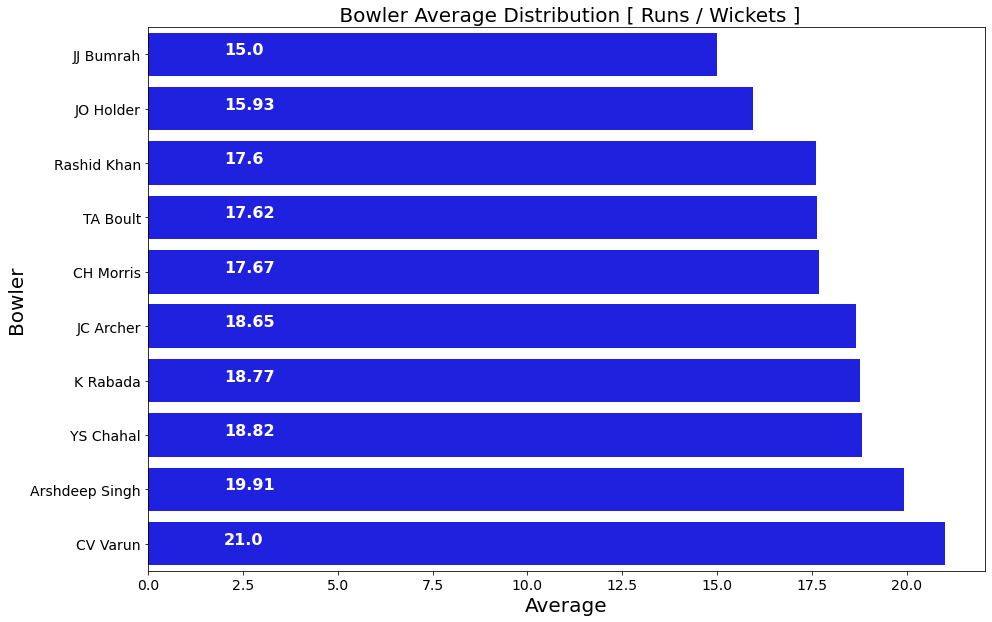

In [17]:
bowler_stats = bowler_stats.sort_values(by = "average",ascending = True)
xlabel_name = "Average"
ylabel_name = "Bowler"
title_name = " Bowler Average Distribution [ Runs / Wickets ]"

sns.barplot( x = "average" , y = "bowler" , data = bowler_stats.head(10), color = "blue")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(bowler_stats.head(10)["average"].values):
    ax.text(2, i, v,fontsize=16,color='white',weight='bold')

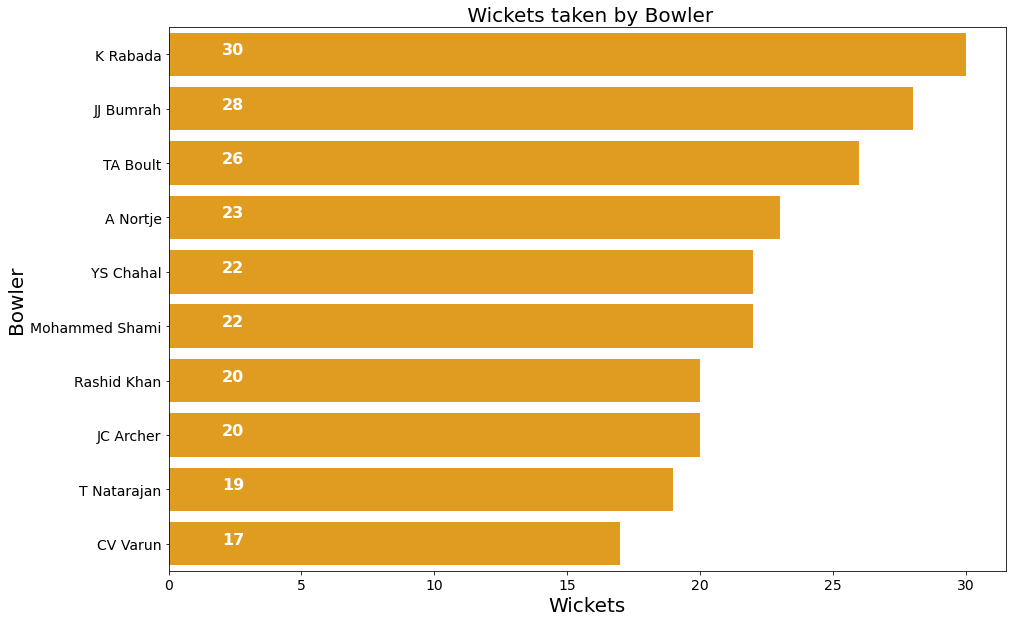

In [18]:
wickets_bowler = wickets_bowler.sort_values(by = "wickets",ascending = False)
xlabel_name = "Wickets"
ylabel_name = "Bowler"
title_name = " Wickets taken by Bowler"

sns.barplot( x = "wickets" , y = "bowler" , data = wickets_bowler.head(10), color = "orange")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(wickets_bowler.head(10)["wickets"].values):
    ax.text(2, i, v,fontsize=16,color='white',weight='bold')

In [19]:
bowler_stats["strike_rate"] = round(bowler_stats["deliveries"] / bowler_stats["wickets"],2)

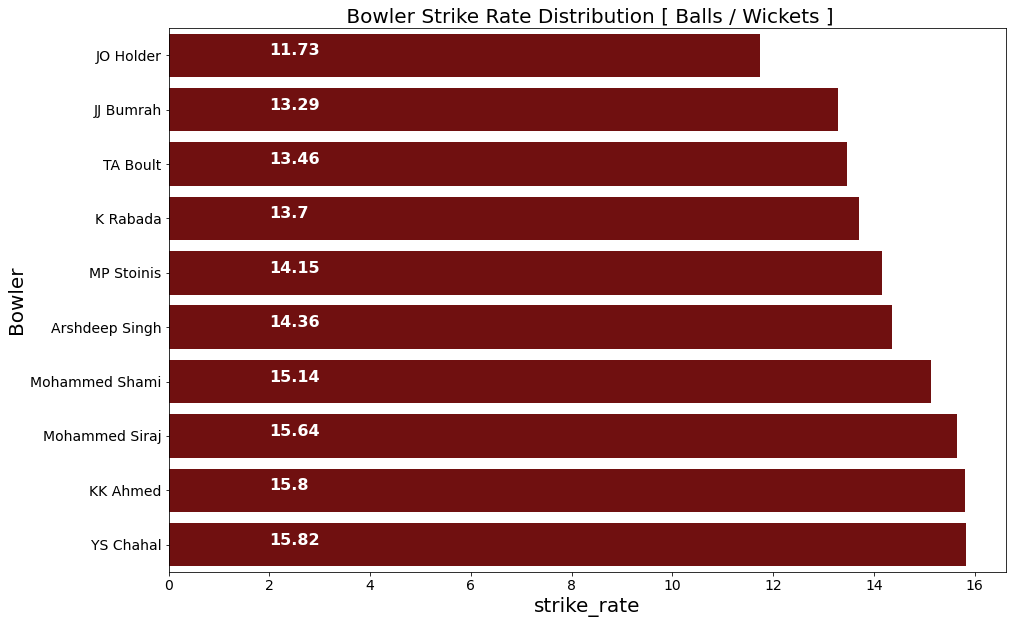

In [20]:
bowler_stats = bowler_stats.sort_values(by = "strike_rate",ascending = True)
xlabel_name = "strike_rate"
ylabel_name = "Bowler"
title_name = " Bowler Strike Rate Distribution [ Balls / Wickets ]"

sns.barplot( x = "strike_rate" , y = "bowler" , data = bowler_stats.head(10), color = "maroon")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(bowler_stats.head(10)["strike_rate"].values):
    ax.text(2, i, v,fontsize=16,color='white',weight='bold')

In [21]:
bowler_stats["econ"] = round((bowler_stats["runs_total"] / bowler_stats["deliveries"])*6,2)

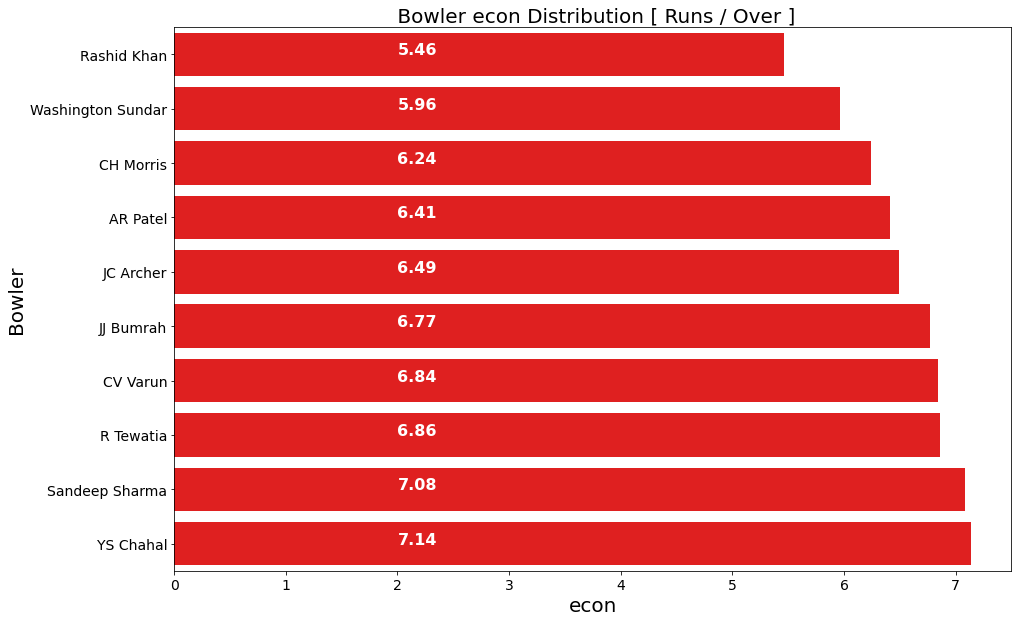

In [22]:
bowler_stats = bowler_stats.sort_values(by = "econ",ascending = True)
xlabel_name = "econ"
ylabel_name = "Bowler"
title_name = " Bowler econ Distribution [ Runs / Over ]"

sns.barplot( x = "econ" , y = "bowler" , data = bowler_stats.head(10), color = "red")

draw_plot(xlabel_name = xlabel_name ,
             ylabel_name = ylabel_name,
             title_name = title_name)

fig = plt.gcf()
ax = fig.gca()


for i , v in enumerate(bowler_stats.head(10)["econ"].values):
    ax.text(2, i, v,fontsize=16,color='white',weight='bold')

In [23]:
bowler_stats["deliveries"].median()

230.0

In [24]:
bowler_stats.sort_values(by="deliveries",ascending = False)

,bowler,runs_total,deliveries,wickets,average,strike_rate,econ
41,K Rabada,563,411,30.0,18.77,13.70,8.22
89,T Natarajan,520,389,19.0,27.37,20.47,8.02
75,Rashid Khan,352,387,20.0,17.60,19.35,5.46
1,A Nortje,529,376,23.0,23.00,16.35,8.44
36,JJ Bumrah,420,372,28.0,15.00,13.29,6.77
90,TA Boult,458,350,26.0,17.62,13.46,7.85
97,YS Chahal,414,348,22.0,18.82,15.82,7.14
33,JC Archer,373,345,20.0,18.65,17.25,6.49
60,Mohammed Shami,474,333,22.0,21.55,15.14,8.54
74,RD Chahar,439,323,16.0,27.44,20.19,8.15


In [25]:
bowler_stats.columns

Index(['bowler', 'runs_total', 'deliveries', 'wickets', 'average',
       'strike_rate', 'econ'],
      dtype='object')

In [26]:
bowler_stats = bowler_stats[bowler_stats["deliveries"] > bowler_stats["deliveries"].median()]

In [27]:
bowler_all_stats_4 = bowler_stats[['wickets', 'average','strike_rate', 'econ']]

In [28]:
bowler_all_stats_4 = bowler_all_stats_4.fillna(0)
bowler_all_stats_4.index =bowler_stats.bowler

In [29]:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(bowler_all_stats_4), index=bowler_all_stats_4.index, columns=bowler_all_stats_4.columns)

In [30]:
X

,wickets,average,strike_rate,econ
bowler,,,,
Rashid Khan,0.594055,-0.970861,-0.430497,-2.300404
Washington Sundar,-1.110625,0.382608,1.141248,-1.729466
AR Patel,-0.800683,0.088338,0.526266,-1.215622
JC Archer,0.594055,-0.880515,-0.662775,-1.124272
JJ Bumrah,1.833823,-1.194575,-1.100784,-0.804547
CV Varun,0.129142,-0.678312,-0.534469,-0.724615
R Tewatia,-0.800683,0.072850,0.305049,-0.701778
Sandeep Sharma,-0.335770,-0.187002,-0.066595,-0.450565
YS Chahal,0.903997,-0.865887,-0.820945,-0.382053


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [32]:
from sklearn.decomposition import PCA

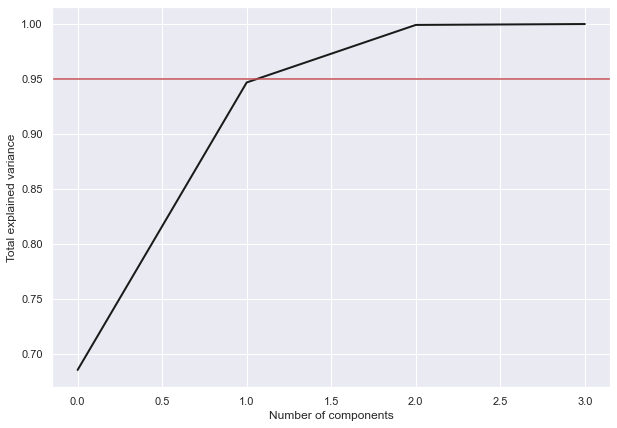

In [33]:
pca = PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.axhline(0.95, c='r')
plt.show();

In [34]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1','PC2','PC3','PC4'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4
bowler,,,,
Rashid Khan,-1.274991,2.259483,0.189347,-0.077066
Washington Sundar,1.418536,1.902820,-0.117618,0.163023
AR Patel,0.740149,1.331913,-0.280980,0.053171
JC Archer,-1.295609,1.071934,0.003692,-0.061716
JJ Bumrah,-2.407787,0.604923,0.692490,-0.077631


In [35]:
df_plot = df_plot.reset_index()

In [36]:
df_plot.sort_values(by = 'PC1',ascending = True).head(15)

,bowler,PC1,PC2,PC3,PC4
4,JJ Bumrah,-2.407787,0.604923,0.692490,-0.077631
19,K Rabada,-2.274308,-1.085934,0.914429,0.059057
13,TA Boult,-2.026704,-0.589499,0.400211,0.026239
8,YS Chahal,-1.512221,0.290592,0.121195,-0.030688
22,Mohammed Shami,-1.333209,-1.309671,0.010477,0.075578
3,JC Archer,-1.295609,1.071934,0.003692,-0.061716
0,Rashid Khan,-1.274991,2.259483,0.189347,-0.077066
21,A Nortje,-1.273415,-1.218949,0.252019,0.055975
5,CV Varun,-0.822368,0.724249,-0.292363,-0.034744
17,T Natarajan,-0.466817,-0.677560,0.120768,0.007138


# PCA

In [37]:
bowler_all_stats_4

,wickets,average,strike_rate,econ
bowler,,,,
Rashid Khan,20.0,17.60,19.35,5.46
Washington Sundar,9.0,33.33,33.56,5.96
AR Patel,11.0,29.91,28.00,6.41
JC Archer,20.0,18.65,17.25,6.49
JJ Bumrah,28.0,15.00,13.29,6.77
CV Varun,17.0,21.00,18.41,6.84
R Tewatia,11.0,29.73,26.00,6.86
Sandeep Sharma,14.0,26.71,22.64,7.08
YS Chahal,22.0,18.82,15.82,7.14


## Scale X

In [38]:
X_std = pd.DataFrame(scale(bowler_all_stats_4), index=bowler_all_stats_4.index, columns=bowler_all_stats_4.columns)

In [39]:
X_std

,wickets,average,strike_rate,econ
bowler,,,,
Rashid Khan,0.594055,-0.970861,-0.430497,-2.300404
Washington Sundar,-1.110625,0.382608,1.141248,-1.729466
AR Patel,-0.800683,0.088338,0.526266,-1.215622
JC Archer,0.594055,-0.880515,-0.662775,-1.124272
JJ Bumrah,1.833823,-1.194575,-1.100784,-0.804547
CV Varun,0.129142,-0.678312,-0.534469,-0.724615
R Tewatia,-0.800683,0.072850,0.305049,-0.701778
Sandeep Sharma,-0.335770,-0.187002,-0.066595,-0.450565
YS Chahal,0.903997,-0.865887,-0.820945,-0.382053


In [40]:
X_std["wickets"].mean() , X_std["wickets"].std() 

(-1.8503717077085943e-16, 1.0215078369104982)

# Covariance Matrix

In [41]:
cov_mat = np.cov(X_std.T)
cov_mat

array([[ 1.04347826, -0.84435831, -0.87330033,  0.02317119],
       [-0.84435831,  1.04347826,  0.99632822,  0.24359081],
       [-0.87330033,  0.99632822,  1.04347826, -0.05675272],
       [ 0.02317119,  0.24359081, -0.05675272,  1.04347826]])

# Eigendecomposition on the covariance matrix

In [42]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.55465431  0.11913501 -0.82350626 -0.00169702]
 [ 0.58715401  0.15347859 -0.3718135  -0.70245941]
 [ 0.58716677 -0.12925316 -0.41557838  0.68251258]
 [ 0.05332867  0.97239128  0.1043397   0.20180309]]

Eigenvalues 
[2.85957449 1.09230834 0.21860751 0.0034227 ]


In [43]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.8595744915520713
1.0923083403382419
0.21860751141648413
0.003422700171464725


# Projection Onto the New Feature Space

In [44]:
eig_pairs[0]

(2.8595744915520713,
 array([-0.55465431,  0.58715401,  0.58716677,  0.05332867]))

In [45]:
eig_pairs[0][1]

array([-0.55465431,  0.58715401,  0.58716677,  0.05332867])

In [46]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1) ,
                      eig_pairs[2][1].reshape(4,1) ,
                      eig_pairs[3][1].reshape(4,1) 
                     
                     ))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.55465431  0.11913501 -0.82350626 -0.00169702]
 [ 0.58715401  0.15347859 -0.3718135  -0.70245941]
 [ 0.58716677 -0.12925316 -0.41557838  0.68251258]
 [ 0.05332867  0.97239128  0.1043397   0.20180309]]


In [47]:
w_df = pd.DataFrame(matrix_w)

In [48]:
w_df

,0,1,2,3
0,-0.554654,0.119135,-0.823506,-0.001697
1,0.587154,0.153479,-0.371813,-0.702459
2,0.587167,-0.129253,-0.415578,0.682513
3,0.053329,0.972391,0.104340,0.201803


In [49]:
w_df.rename(columns = {0: 'PC1', 1: 'PC2',2: 'PC3', 3: 'PC4'}, inplace = True)

In [50]:
w_df

,PC1,PC2,PC3,PC4
0,-0.554654,0.119135,-0.823506,-0.001697
1,0.587154,0.153479,-0.371813,-0.702459
2,0.587167,-0.129253,-0.415578,0.682513
3,0.053329,0.972391,0.104340,0.201803


In [51]:
bowlers = ["wickets","average","strike_rate","econ"]

In [52]:
component_number = "PC1"

In [53]:
components_n = pd.DataFrame()
components_n["value"] =w_df[component_number]
components_n["bowlers"] = bowlers

In [54]:
def plot_component_number(component_number,color = "blue"):
    components_n = pd.DataFrame()
    components_n["value"] =w_df[component_number]
    components_n["bowlers"] = bowlers
    sns.barplot( y = 'value', x = 'bowlers', data = components_n, color=color)

    xlabel_name = "Component"
    ylabel_name = "Value"

    fig=plt.gcf()
    fig.set_size_inches(15,10)

    plt.tick_params(labelsize=14)
    plt.title(title_name,fontsize = 20)
    plt.xlabel(xlabel_name,fontsize = 20)
    plt.ylabel(ylabel_name,fontsize = 20)
    plt.xticks(rotation=90)

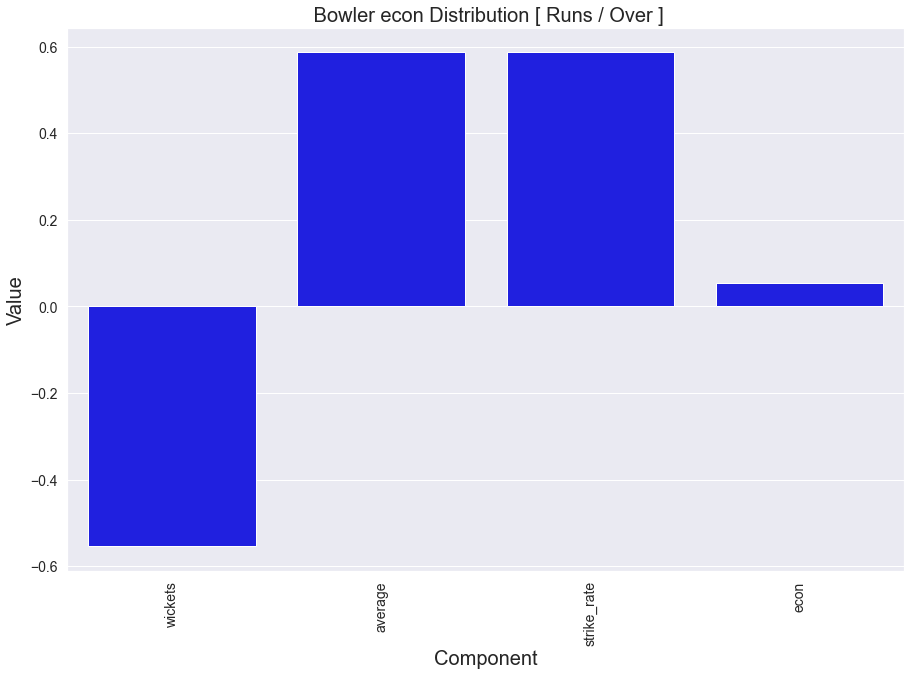

In [55]:
plot_component_number("PC1")

In [56]:
Y = X_std.dot(matrix_w)

In [57]:
Y

,0,1,2,3
bowler,,,,
Rashid Khan,-1.274991,-2.259483,-0.189347,-0.077066
Washington Sundar,1.418536,-1.902820,0.117618,0.163023
AR Patel,0.740149,-1.331913,0.280980,0.053171
JC Archer,-1.295609,-1.071934,-0.003692,-0.061716
JJ Bumrah,-2.407787,-0.604923,-0.692490,-0.077631
CV Varun,-0.822368,-0.724249,0.292363,-0.034744
R Tewatia,0.628567,-0.806040,0.432286,0.016763
Sandeep Sharma,0.013307,-0.498221,0.326703,-0.004447
YS Chahal,-1.512221,-0.290592,-0.121195,-0.030688


In [58]:
Y_1 = Y.reset_index()


In [59]:
Y_1

,bowler,0,1,2,3
0,Rashid Khan,-1.274991,-2.259483,-0.189347,-0.077066
1,Washington Sundar,1.418536,-1.902820,0.117618,0.163023
2,AR Patel,0.740149,-1.331913,0.280980,0.053171
3,JC Archer,-1.295609,-1.071934,-0.003692,-0.061716
4,JJ Bumrah,-2.407787,-0.604923,-0.692490,-0.077631
5,CV Varun,-0.822368,-0.724249,0.292363,-0.034744
6,R Tewatia,0.628567,-0.806040,0.432286,0.016763
7,Sandeep Sharma,0.013307,-0.498221,0.326703,-0.004447
8,YS Chahal,-1.512221,-0.290592,-0.121195,-0.030688
9,Ravi Bishnoi,0.049812,-0.370480,0.320595,-0.004036


In [60]:
Y_1.rename(columns = {0: 'PC1', 1: 'PC2'}, inplace = True)
Y_1.sort_values(by = 'PC1',ascending = True).head(15)

,bowler,PC1,PC2,2,3
4,JJ Bumrah,-2.407787,-0.604923,-0.692490,-0.077631
19,K Rabada,-2.274308,1.085934,-0.914429,0.059057
13,TA Boult,-2.026704,0.589499,-0.400211,0.026239
8,YS Chahal,-1.512221,-0.290592,-0.121195,-0.030688
22,Mohammed Shami,-1.333209,1.309671,-0.010477,0.075578
3,JC Archer,-1.295609,-1.071934,-0.003692,-0.061716
0,Rashid Khan,-1.274991,-2.259483,-0.189347,-0.077066
21,A Nortje,-1.273415,1.218949,-0.252019,0.055975
5,CV Varun,-0.822368,-0.724249,0.292363,-0.034744
17,T Natarajan,-0.466817,0.677560,-0.120768,0.007138


In [61]:
df_plot.sort_values(by = 'PC1',ascending = True).head(15)

,bowler,PC1,PC2,PC3,PC4
4,JJ Bumrah,-2.407787,0.604923,0.692490,-0.077631
19,K Rabada,-2.274308,-1.085934,0.914429,0.059057
13,TA Boult,-2.026704,-0.589499,0.400211,0.026239
8,YS Chahal,-1.512221,0.290592,0.121195,-0.030688
22,Mohammed Shami,-1.333209,-1.309671,0.010477,0.075578
3,JC Archer,-1.295609,1.071934,0.003692,-0.061716
0,Rashid Khan,-1.274991,2.259483,0.189347,-0.077066
21,A Nortje,-1.273415,-1.218949,0.252019,0.055975
5,CV Varun,-0.822368,0.724249,-0.292363,-0.034744
17,T Natarajan,-0.466817,-0.677560,0.120768,0.007138
